# Homework 7. K-means and Recommendation system

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`

In [1]:
# YOUR CODE HERE. You may use as many code cells as you want.

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
df1=pd.read_csv("sample_data_1.csv")

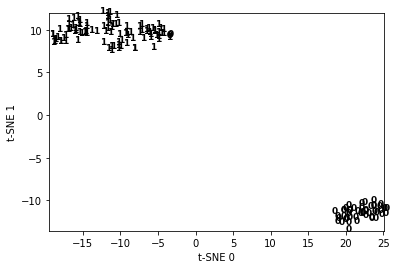

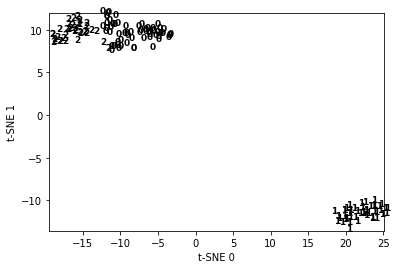

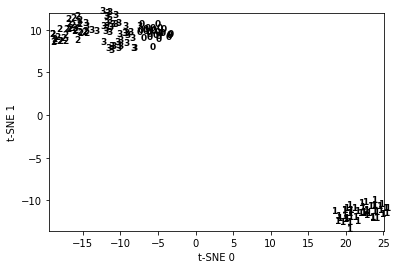

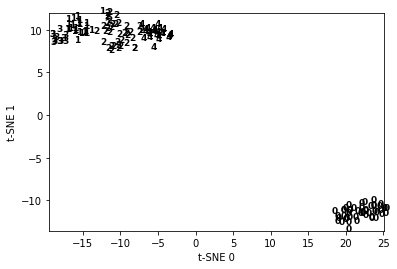

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(random_state=0)
df1_tsne=tsne.fit_transform(df1)

for k in range(2,6):
    kmeans=KMeans(n_clusters=k).fit(df1)
    labels=kmeans.labels_

    for i in range(len(df1)):
        plt.text(df1_tsne[i, 0], df1_tsne[i, 1], str(labels[i]),
             fontdict={'weight': 'bold', 'size':9}) 

    plt.xlim(df1_tsne[:, 0].min(), df1_tsne[:, 0].max()) 
    plt.ylim(df1_tsne[:, 1].min(), df1_tsne[:, 1].max()) 
    plt.xlabel('t-SNE 0') 
    plt.ylabel('t-SNE 1') 
    plt.show() 

In [4]:
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_1.csv', 'r') as rf2:
    reader = csv.reader(rf2)
    X1 = np.array(list(reader))
X1 = X1.astype(float)
print(X1.shape)

(150, 4)


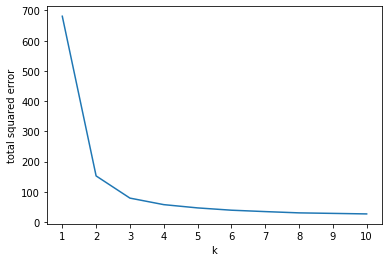

In [5]:
score=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k).fit(X1)
    close_center=kmeans.cluster_centers_[kmeans.labels_]
    score.append(np.sum((X1-close_center)**2))
ks = range(1, 11)
plt.plot(ks, score)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

In [6]:
#우선 sklearn을 통해 결과를 도출해보고, 참고 한다.
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
df2=pd.read_csv("sample_data_2.csv")
df2.shape

(1796, 3)

In [7]:
kmeans=KMeans(n_clusters=8).fit(df2)
labels=kmeans.labels_
print(labels)
type(labels)

[1 1 4 ... 1 4 1]


numpy.ndarray

In [8]:
kmeans.cluster_centers_

array([[ -9.23101026,   7.6208669 ,   6.89552686],
       [ -4.35924211,   2.79114661,  -5.34285467],
       [ -2.08527359, -11.06357972,   4.1254816 ],
       [  7.16112702,  11.14827941, -10.35441397],
       [  5.47858791,   5.36070739,   6.29081455],
       [  2.94271816,  -7.85257924, -12.00006503],
       [ 14.80765177, -12.01888993,   1.69807302],
       [-16.80225972,  -3.08825435,   1.98122571]])

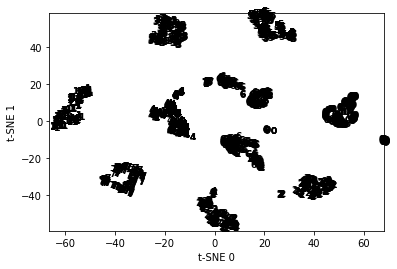

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(random_state=0)
df2_tsne=tsne.fit_transform(df2)
kmeans=KMeans(n_clusters=8).fit(df2)
labels=kmeans.labels_

for i in range(len(df2)):
    plt.text(df2_tsne[i, 0], df2_tsne[i, 1], str(labels[i]),
            fontdict={'weight': 'bold', 'size':9}) 

plt.xlim(df2_tsne[:, 0].min(), df2_tsne[:, 0].max()) 
plt.ylim(df2_tsne[:, 1].min(), df2_tsne[:, 1].max()) 
plt.xlabel('t-SNE 0') 
plt.ylabel('t-SNE 1') 
plt.show() 
#그림을 통해 확인해 보면, k는10정도가 적합할 듯 하다.

In [10]:
#numpy로 바꿨으나 더 느려진 부분.
#                 temp_centers=np.zeros((self.n_clusters,(len(X[1,:]))))
#                 numbers=np.zeros(self.n_clusters)
#                 for i in range(len(X)):
#                     temp_centers[self.labels_[i]]+=X[i]
#                     numbers[self.labels_[i]]+=1
#                 self.cluster_centers_=temp_centers/numbers[:,np.newaxis]
#                 print(X.shape)

In [11]:
import numpy as np
import random
from sklearn.metrics.pairwise import euclidean_distances
class MyKMeans:
    """performs k-means clustering using numpy"""
    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters

        
    def fit(self, X):#X=inputs
        X = X.astype(float)
        max_score=-np.inf      
        for x in range(self.n_init): 
            random.seed(self.n_init)
            self.cluster_centers_ = np.array(random.sample(list(X),self.n_clusters))
            self.labels_=None
            for y in range(self.max_iter):
                self.labels_=np.array(list(map(self.predict,X))) 
                old_cluster_centers_=self.cluster_centers_
                
                for i in range(self.n_clusters):
                    i_points=np.array([p for p, a in zip(X,self.labels_) if a==i])
                    self.cluster_centers_[i]=np.sum(i_points,axis=0)/len(i_points)
                if np.sum(np.sqrt(np.sum((old_cluster_centers_-self.cluster_centers_)**2,axis=1)))<self.EPSILON:
                    break
            if max_score<self.score(X):
                max_score=self.score(X)
                max_cluster_centers_=self.cluster_centers_
                max_labels_=self.labels_
                
        self.cluster_centers_=max_cluster_centers_
        self.labels_=max_labels_
        return self
            
    def predict(self, X):
        X = X.astype(float)
        Y=np.sum((X-self.cluster_centers_)**2,axis=1)
        return np.argmin(Y)
#         return min(range(self.n_clusters),
#                   key=lambda i: np.linalg.norm(X-self.cluster_centers_[i]))

    def score(self, X):
        X = X.astype(float)
        close_center=self.cluster_centers_[self.labels_]
#         print(close_center)
        return -np.sum(np.sum((X-close_center)**2,axis=1))
#             return -np.sum(np.sum((X-self.cluster_centers_[label])**2) for X, label in zip(X,self.labels_))


In [12]:
%matplotlib inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv
with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

m1=MyKMeans(n_clusters=2, n_init=300,max_iter=15).fit(X2)
print(m1.score(X2))
print(m1.cluster_centers_)
print(m1.labels_)

-310509.60379649897
[[ 0.22608102 -5.19798094 -4.33908936]
 [-0.73411689  5.36757592  3.35220999]]
[0 0 0 ... 0 1 1]


### Run the following code:

In [13]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0


### Your output must be the following:
```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```

### Run the following code:

In [14]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

Wall time: 6.57 s


윈도우 시스템 with open('sample_data_2.csv', 'rb') as rf:

### Your code will be graded based on the correctness and the performance
### My implementation result:
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
Wall time: 4.2 s
```

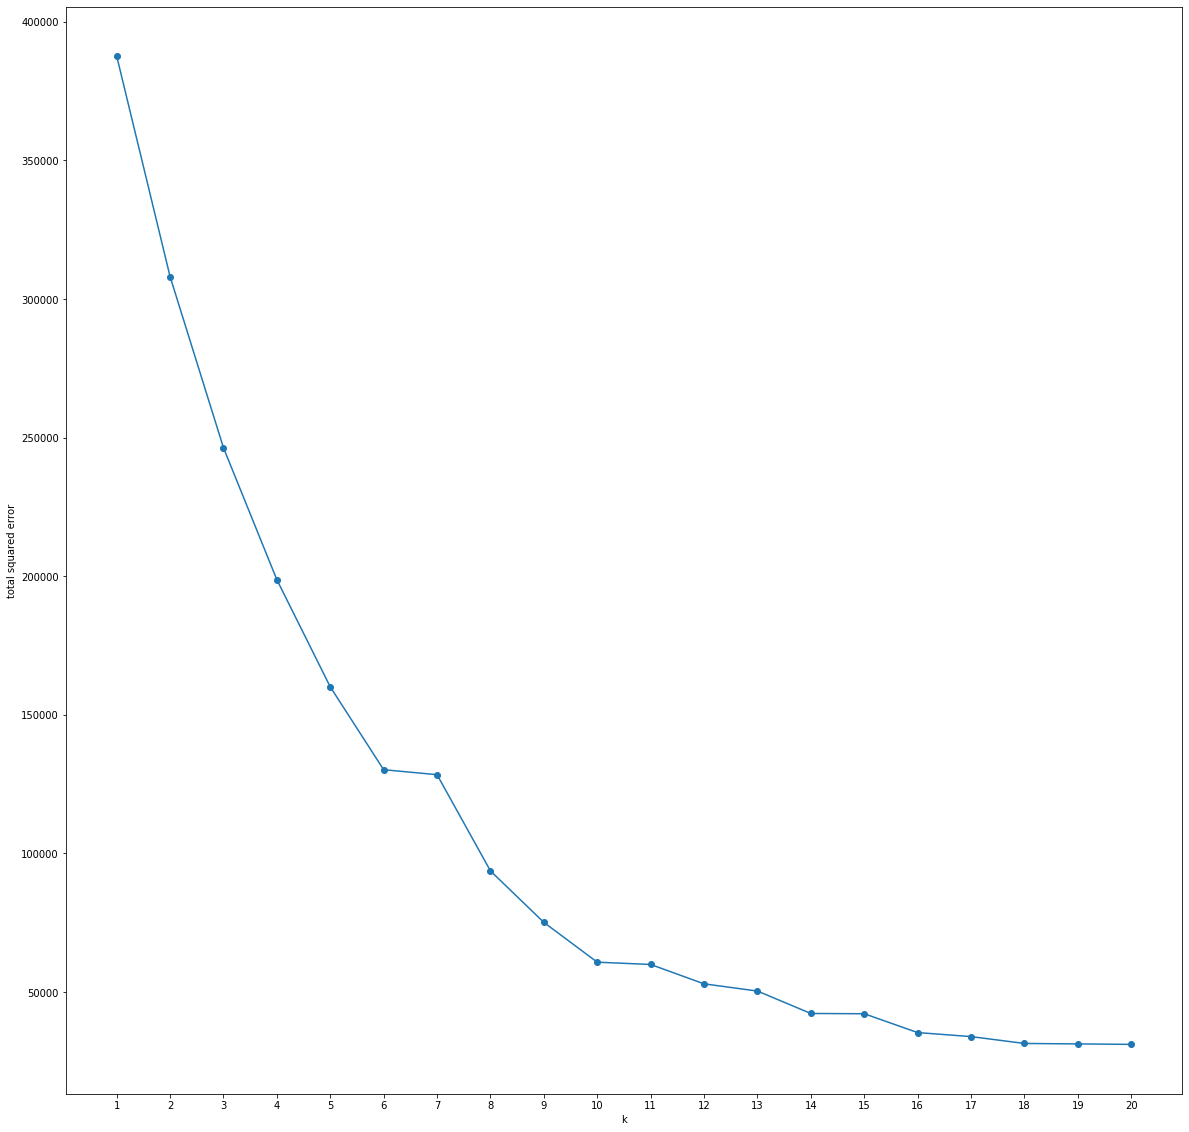

In [15]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
<img src="hw8_1.png">

## Problem 3 (40 pts): Recommender implementation

- Make your own implementaion of item-based recommender system
- You may use the code in textbook, but it may be too slow for large datasets.
- You shouldn't import and use any module implementing recommender system directly
- Use cosine similarity for item similarity (Assume that all null values are zero)

- We will use movie rating dataset

In [16]:
import pandas as pd

movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [18]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
ratings = pd.read_csv('ratings.csv')
ratings.tail(5)

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [20]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

In [21]:
def cosine_similarity(v, w):
    return dot(v, w) / math.sqrt(dot(v, v) * dot(w, w))

In [22]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

In [23]:
movieIds=movies['movieId']

In [24]:
user1_m=set(ratings.movieId[ratings.userId==1])
# print(user1_m)

In [25]:
users_interests=[]
for k in range(1,611):
    users_interests.append(set(ratings.movieId[ratings.userId==k]))

In [26]:
# print(users_interests)

In [27]:
# user1=[1 if movieId in user1_m else 0
#        for movieId in movieIds]
# print(user1)

In [28]:
def user_vector(user_interests):
    
    return [1 if movieId in user_interests else 0
       for movieId in movieIds]

In [29]:
user_interest_matrix = list(map(user_vector, users_interests))
# print(user_interest_matrix)
# print(user_interest_matrix[:2])

In [30]:
interest_user_matrix = [[user_interest_vector[j]
 for user_interest_vector in user_interest_matrix]
 for j, _ in enumerate(movieIds)]

In [31]:
interest_similarities = cosine_similarity(interest_user_matrix)
print(interest_similarities)

[[1.         0.44217414 0.30264192 ... 0.         0.         0.        ]
 [0.44217414 1.         0.34377583 ... 0.         0.         0.        ]
 [0.30264192 0.34377583 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [32]:
def most_similar_interests_to(interest_id):
    similarities = interest_similarities[interest_id]
    pairs = [(movies['title'][movies.movieId==movieIds[other_interest_id]], similarity)
 for other_interest_id, similarity in enumerate(similarities)
 if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,
 key=lambda pair: pair[1],
 reverse=True)

In [33]:
most_similar_interests_to(0)[:10]

[(615    Independence Day (a.k.a. ID4) (1996)
  Name: title, dtype: object,
  0.5854164421810863),
 (418    Jurassic Park (1993)
  Name: title, dtype: object,
  0.5835340767778626),
 (314    Forrest Gump (1994)
  Name: title, dtype: object,
  0.579033301781507),
 (224    Star Wars: Episode IV - A New Hope (1977)
  Name: title, dtype: object,
  0.5768311534243158),
 (546    Mission: Impossible (1996)
  Name: title, dtype: object,
  0.5679748794451519),
 (911    Star Wars: Episode VI - Return of the Jedi (1983)
  Name: title, dtype: object,
  0.565081024132678),
 (2355    Toy Story 2 (1999)
  Name: title, dtype: object,
  0.5608928731515868),
 (322    Lion King, The (1994)
  Name: title, dtype: object,
  0.5564169153313431),
 (964    Groundhog Day (1993)
  Name: title, dtype: object,
  0.5532029477346797),
 (969    Back to the Future (1985)
  Name: title, dtype: object,
  0.5528261526609964)]

In [34]:
def most_similar_interests_to(interest_id):
    similarities = interest_similarities[interest_id]
    pairs = [(movieIds[other_interest_id], similarity)
 for other_interest_id, similarity in enumerate(similarities)
 if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,
 key=lambda pair: pair[1],
 reverse=True)
# title1=movies['title'][movies.movieId==movieIds[other_interest_id]]

In [35]:
most_similar_interests_to(0)[:10]

[(780, 0.5854164421810863),
 (480, 0.5835340767778626),
 (356, 0.579033301781507),
 (260, 0.5768311534243158),
 (648, 0.5679748794451519),
 (1210, 0.565081024132678),
 (3114, 0.5608928731515868),
 (364, 0.5564169153313431),
 (1265, 0.5532029477346797),
 (1270, 0.5528261526609964)]

In [36]:
from collections import defaultdict
def item_based_suggestions(user_id, include_current_interests=False):
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_matrix[user_id]
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id)
            for interest, similarity in similar_interests:
                suggestions[interest] += similarity
    suggestions = sorted(suggestions.items(),
                     key=lambda pair: pair[1],
                     reverse=True)
    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight)
             for suggestion, weight in suggestions
             if suggestion not in users_interests[user_id]]

In [37]:
# from collections import defaultdict
# def item_based_suggestions(user_id, include_current_interests=False):
#     suggestions = defaultdict(float)
#     user_interest_vector = user_interest_matrix[user_id]
#     for interest_id, is_interested in enumerate(user_interest_vector):
#         if is_interested == 1:
#             similar_interests = most_similar_interests_to(interest_id)
#             for interest, similarity in similar_interests:
#                 suggestions[interest] += similarity
#     suggestions = sorted(suggestions.items(),
#                      key=lambda pair: pair[1],
#                      reverse=True)
#     if include_current_interests:
#         return suggestions
#     else:
#         return [(movies['title'][movies.movieId==movieIds[suggestion]], weight)
#              for suggestion, weight in suggestions
#              if suggestion not in users_interests[user_id]]

In [38]:
item_based_suggestions(1)[:10]

[(69122, 11.287130362666016),
 (59315, 10.952418999937072),
 (72998, 10.903247966927685),
 (33794, 10.891828687177071),
 (2959, 10.787877218144377),
 (73017, 10.733814999484862),
 (7438, 10.598274727008851),
 (68954, 10.545312019379947),
 (79702, 10.417843308915273),
 (44191, 10.35929197713659)]

In [39]:
title1=movies['title'][movies.movieId==69122]
print(title1)

7043    Hangover, The (2009)
Name: title, dtype: object


In [40]:
recommand=item_based_suggestions(1)[:10]

In [41]:
print(recommand)
type(recommand)

[(69122, 11.287130362666016), (59315, 10.952418999937072), (72998, 10.903247966927685), (33794, 10.891828687177071), (2959, 10.787877218144377), (73017, 10.733814999484862), (7438, 10.598274727008851), (68954, 10.545312019379947), (79702, 10.417843308915273), (44191, 10.35929197713659)]


list

In [42]:
recommand_name=[a for a,b in recommand]
print(recommand_name)
titles=[]
for i in recommand_name:
    print(movies['title'][movies.movieId==i],movies['genres'][movies.movieId==i],"\n")
print(titles)

[69122, 59315, 72998, 33794, 2959, 73017, 7438, 68954, 79702, 44191]
7043    Hangover, The (2009)
Name: title, dtype: object 7043    Comedy|Crime
Name: genres, dtype: object 

6743    Iron Man (2008)
Name: title, dtype: object 6743    Action|Adventure|Sci-Fi
Name: genres, dtype: object 

7212    Avatar (2009)
Name: title, dtype: object 7212    Action|Adventure|Sci-Fi|IMAX
Name: genres, dtype: object 

5917    Batman Begins (2005)
Name: title, dtype: object 5917    Action|Crime|IMAX
Name: genres, dtype: object 

2226    Fight Club (1999)
Name: title, dtype: object 2226    Action|Crime|Drama|Thriller
Name: genres, dtype: object 

7214    Sherlock Holmes (2009)
Name: title, dtype: object 7214    Action|Crime|Mystery|Thriller
Name: genres, dtype: object 

4935    Kill Bill: Vol. 2 (2004)
Name: title, dtype: object 4935    Action|Drama|Thriller
Name: genres, dtype: object 

7039    Up (2009)
Name: title, dtype: object 7039    Adventure|Animation|Children|Drama
Name: genres, dtype: object 



## The following is top 10 recommendations of movie titles and their genres  from top 1 to top 10 for user 1
```
Ferris Bueller's Day Off (1986)                   Comedy              
Die Hard (1988)                                   Action|Crime|Thriller
Breakfast Club, The (1985)                        Comedy|Drama        
Fifth Element, The (1997)                         Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                                     Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                              Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                           Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999)      Action|Adventure|Comedy
2001: A Space Odyssey (1968)                      Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)                 Action|Sci-Fi       
```    

In [43]:
#해당하는 rating을 가지고 와야 한다.

def user_vector(user_interests):   
    return [ratings.rating[ratings.movieId=movieId][ratings.userId=] if movieId in user_interests else 0
       for movieId in movieIds]

SyntaxError: invalid syntax (<ipython-input-43-0d75ce79e68c>, line 4)

## Find top 10 recommendations of movie titles and their genres from top 1 to top 10 for user 2

In [44]:
# YOUR CODE HERE. You may use as many code cells as you want.

In [45]:
recommand2=item_based_suggestions(2)[:10]

In [46]:
recommand_name2=[a for a,b in recommand2]
print(recommand_name2)
for i in recommand_name2:
    print(movies['title'][movies.movieId==i],movies['genres'][movies.movieId==i],"\n")

[919, 2985, 1214, 2003, 2115, 1097, 2529, 3033, 1265, 2987]
701    Wizard of Oz, The (1939)
Name: title, dtype: object 701    Adventure|Children|Fantasy|Musical
Name: genres, dtype: object 

2248    RoboCop (1987)
Name: title, dtype: object 2248    Action|Crime|Drama|Sci-Fi|Thriller
Name: genres, dtype: object 

915    Alien (1979)
Name: title, dtype: object 915    Horror|Sci-Fi
Name: genres, dtype: object 

1478    Gremlins (1984)
Name: title, dtype: object 1478    Comedy|Horror
Name: genres, dtype: object 

1576    Indiana Jones and the Temple of Doom (1984)
Name: title, dtype: object 1576    Action|Adventure|Fantasy
Name: genres, dtype: object 

836    E.T. the Extra-Terrestrial (1982)
Name: title, dtype: object 836    Children|Drama|Sci-Fi
Name: genres, dtype: object 

1905    Planet of the Apes (1968)
Name: title, dtype: object 1905    Action|Drama|Sci-Fi
Name: genres, dtype: object 

2286    Spaceballs (1987)
Name: title, dtype: object 2286    Comedy|Sci-Fi
Name: genres, dtype: o